# C-CORE STAC API
The C-CORE STAC API is a [STAC](https://stacspec.org/) compliant catalog of C-CORE earth observation and remote sensing products. It extends the [STAC FastAPI](https://github.com/stac-utils/stac-fastapi) library. Documentation is available at https://c-stac-api.c-core.app/docs .

## Base url for the API

In [1]:
api_url = "https://c-stac-api.c-core.app"

## Collections
Each C-CORE service (e.g. ice-drift-feature-tracking) is indexed as a collection. We can list all available collections.

### List all collections

In [4]:
import httpx


get_collections_url = f"{api_url}/collections"

with httpx.Client(timeout = 20) as client:
    response = client.get(get_collections_url)
    
response

<Response [200 OK]>

In [11]:
response_body = response.json()
collections = response_body["collections"]
collections

[{'type': 'Collection',
  'id': 'joplin',
  'stac_extensions': [],
  'stac_version': '1.0.0',
  'title': None,
  'description': 'This imagery was acquired by the NOAA Remote Sensing Division to support NOAA national security and emergency response requirements. In addition, it will be used for ongoing research efforts for testing and developing standards for airborne digital imagery. Individual images have been combined into a larger mosaic and tiled for distribution. The approximate ground sample distance (GSD) for each pixel is 35 cm (1.14 feet).',
  'keywords': None,
  'license': 'public-domain',
  'providers': None,
  'summaries': None,
  'extent': {'spatial': {'bbox': [[-94.6911621,
      37.0332547,
      -94.402771,
      37.1077651]]},
   'temporal': {'interval': [['2000-02-01T00:00:00Z',
      '2000-02-12T00:00:00Z']]}},
  'links': [{'rel': 'self',
    'type': 'application/json',
    'href': 'http://c-stac-api.c-core.app/collections/joplin'},
   {'rel': 'parent',
    'type': '

### List single collection

In [12]:
collection_id = "ice-drift-feature-tracking"
get_collections_url = f"{api_url}/collections/{collection_id}"

with httpx.Client(timeout = 20) as client:
    response = client.get(get_collections_url)
    
response

<Response [200 OK]>

In [13]:
response_body = response.json()
response_body

{'type': 'Collection',
 'id': 'ice-drift-feature-tracking',
 'stac_extensions': [],
 'stac_version': '1.0.0',
 'title': 'Ice Drift Feature Tracking',
 'description': 'Ice drift feature tracking derived from Sentinel 1 data.',
 'keywords': ['Sentinel 1', 'SAR', 'sea ice'],
 'license': 'public-domain',
 'providers': ['C-CORE', 'ESA'],
 'summaries': None,
 'extent': {'spatial': {'bbox': [[-180, -90, 180, 90]]},
  'temporal': {'interval': [['2010-01-01T00:00:00Z',
     '2030-01-01T00:00:00Z']]}},
 'links': [{'rel': 'self',
   'type': 'application/json',
   'href': 'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking'},
  {'rel': 'parent',
   'type': 'application/json',
   'href': 'http://c-stac-api.c-core.app/'},
  {'rel': 'items',
   'type': 'application/geo+json',
   'href': 'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking/items'},
  {'rel': 'root',
   'type': 'application/json',
   'href': 'http://c-stac-api.c-core.app/'}]}

## Items
Each collection has a list of items. Each item maps to a product (e.g. an ice-drift-feature-tracking product derived from a single Sentinel 1 scene).

### List all items in a collection
We specify an optional `limit` of 2 just to keep the example simple. The default `limit` is 10 and can be increased to an arbitrary high integer.

In [16]:
collection_id = "ice-drift-feature-tracking"
limit = 2
get_items_url = f"{api_url}/collections/{collection_id}/items?limit={limit}"

with httpx.Client(timeout = 20) as client:
    response = client.get(get_items_url)
    
response

<Response [200 OK]>

In [17]:
response_body = response.json()
response_body

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'stac_version': '1.0.0',
   'stac_extensions': [],
   'id': 'ice-drift-feature-tracking-2020-09-12T21:13:58.431Z--2020-09-13T11:19:53.117Z',
   'collection': 'ice-drift-feature-tracking',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-58.56408, 75.296111],
      [-58.56408, 77.419261],
      [-68.121641, 77.419261],
      [-68.121641, 75.296111],
      [-58.56408, 75.296111]]]},
   'bbox': [-68.121641, 75.296111, -58.56408, 77.419261],
   'properties': {'format': 'pbf',
    'created': '2021-10-08T18:11:52Z',
    'updated': '2021-10-08T18:11:52Z',
    'datetime': '2020-09-12T21:13:58Z',
    'latitude': 76.058445,
    'tile_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:13:58.431Z--2020-09-13T11:19:53.117Z/{z}/{x}/{y}.pbf',
    'longitude': -64.863281,
    'geojson_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-1

## List the next items
The results are paginated, returning just `limit` number of items per request. To view the next `limit` number of items, use the `next` `link`.

In [19]:
next_link = response_body["links"][0]
next_link

{'rel': 'next',
 'type': 'application/geo+json',
 'href': 'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking/items?token=Kh_tgzOb&limit=2',
 'method': 'GET'}

The `href` string is the url to fetch the next list of items.

In [21]:
next_link["href"]

'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking/items?token=Kh_tgzOb&limit=2'

In [37]:
with httpx.Client(timeout = 20, follow_redirects=True) as client:
    response = client.get(next_link["href"])
    
response_body = response.json()
response_body

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'stac_version': '1.0.0',
   'stac_extensions': [],
   'id': 'ice-drift-feature-tracking-2020-09-12T21:12:58.431Z--2020-09-13T11:19:53.117Z',
   'collection': 'ice-drift-feature-tracking',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-57.220857, 73.941783],
      [-57.220857, 75.154876],
      [-59.187606, 75.154876],
      [-59.187606, 73.941783],
      [-57.220857, 73.941783]]]},
   'bbox': [-59.187606, 73.941783, -57.220857, 75.154876],
   'properties': {'format': 'pbf',
    'created': '2021-10-08T18:11:51Z',
    'updated': '2021-10-08T18:11:51Z',
    'datetime': '2020-09-12T21:12:58Z',
    'latitude': 74.91364,
    'tile_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:12:58.431Z--2020-09-13T11:19:53.117Z/{z}/{x}/{y}.pbf',
    'longitude': -57.480469,
    'geojson_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-0

### Search items
An example of searching by a datetime interval

In [41]:
collection_id = "ice-drift-feature-tracking"

start_datetime = "2020-09-12T00:00:00.00Z"
end_datetime = "2020-09-14T00:00:00.00Z"
datetime_interval = f"{start_datetime}/{end_datetime}"

search_url = f"{api_url}/search?collections={collection_id}&datetime={datetime_interval}"

with httpx.Client(timeout = 20) as client:
    response = client.get(search_url)
    
response_body = response.json()

## For this example, only show last two
response_features = response_body["features"]
response_features[-2:]

[{'type': 'Feature',
  'geometry': {'coordinates': [[[-53.639539, 66.373537],
     [-53.639539, 67.743067],
     [-57.474565, 67.743067],
     [-57.474565, 66.373537],
     [-53.639539, 66.373537]]],
   'type': 'Polygon'},
  'properties': {'datetime': '2020-09-12T21:10:58+00:00'},
  'id': 'ice-drift-feature-tracking-2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z',
  'bbox': [-57.474565, 66.373537, -53.639539, 67.743067],
  'assets': {'geojson': {'title': 'GeoJSON',
    'description': 'Vector data in GeoJSON format',
    'start_datetime': None,
    'end_datetime': None,
    'created': None,
    'updated': None,
    'platform': None,
    'instruments': None,
    'constellation': None,
    'mission': None,
    'providers': None,
    'gsd': None,
    'href': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z.geojson',
    'type': 'application/geo+json',
   

## Get individual item by ID

In [44]:
item_id = "ice-drift-feature-tracking-2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z"
collection_id = "ice-drift-feature-tracking"

get_item_url = f"{api_url}/collections/{collection_id}/items/{item_id}"

with httpx.Client(timeout = 20) as client:
    response = client.get(get_item_url)
    
item = response.json()
item

{'type': 'Feature',
 'stac_version': '1.0.0',
 'stac_extensions': [],
 'id': 'ice-drift-feature-tracking-2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z',
 'collection': 'ice-drift-feature-tracking',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-53.639539, 66.373537],
    [-53.639539, 67.743067],
    [-57.474565, 67.743067],
    [-57.474565, 66.373537],
    [-53.639539, 66.373537]]]},
 'bbox': [-57.474565, 66.373537, -53.639539, 67.743067],
 'properties': {'format': 'pbf',
  'created': '2021-10-08T18:11:51Z',
  'updated': '2021-10-08T18:11:51Z',
  'datetime': '2020-09-12T21:10:58Z',
  'latitude': 67.67599,
  'tile_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/{z}/{x}/{y}.pbf',
  'longitude': -53.639539,
  'geojson_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/2020-09-12T21:10:58.432Z--2020-09-13T

## Links
Links provide URLs to related metadata. For example, the `self` link provides an URL for this STAC item.

In [55]:
self_link = [link for link in item["links"] if link["rel"] == "self"][0]
self_link

{'rel': 'self',
 'type': 'application/geo+json',
 'href': 'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking/items/ice-drift-feature-tracking-2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z'}

### Read `self` link as a data frame
We can use GeoPandas to directly read the metadata from the `self` link.

In [56]:
import geopandas as gpd


self_gdf = gpd.read_file(self_link["href"])
self_gdf

,id,format,created,updated,datetime,latitude,tile_url,longitude,geojson_url,datetime_end,maximum_zoom,metadata_url,minimum_zoom,timestamp_end,datetime_start,timestamp_mean,timestamp_start,datetime_interval,geometry
0,ice-drift-feature-tracking-2020-09-12T21:10:58...,pbf,2021-10-08T18:11:51+00:00,2021-10-08T18:11:51+00:00,2020-09-12T21:10:58+00:00,67.67599,https://coresight-layers.s3-us-west-2.amazonaw...,-53.639539,https://coresight-layers.s3-us-west-2.amazonaw...,2020-09-13T21:02:47.886002+00:00,10,https://coresight-layers.s3-us-west-2.amazonaw...,1,1.600040e+09,2020-09-12T21:10:58.431999+00:00,1.599997e+09,1.599954e+09,2020-09-12T21:10:58.431999+00:00,"POLYGON ((-53.63954 66.37354, -53.63954 67.743..."


<AxesSubplot:>

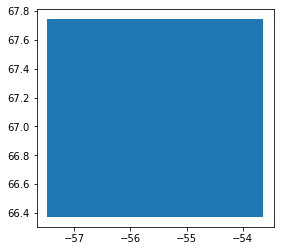

In [58]:
self_gdf.plot()

Alternatively, we can read the item from memory.

In [64]:
import json


item_gdf = gpd.read_file(json.dumps(item))
item_gdf

,id,format,created,updated,datetime,latitude,tile_url,longitude,geojson_url,datetime_end,maximum_zoom,metadata_url,minimum_zoom,timestamp_end,datetime_start,timestamp_mean,timestamp_start,datetime_interval,geometry
0,ice-drift-feature-tracking-2020-09-12T21:10:58...,pbf,2021-10-08T18:11:51+00:00,2021-10-08T18:11:51+00:00,2020-09-12T21:10:58+00:00,67.67599,https://coresight-layers.s3-us-west-2.amazonaw...,-53.639539,https://coresight-layers.s3-us-west-2.amazonaw...,2020-09-13T21:02:47.886002+00:00,10,https://coresight-layers.s3-us-west-2.amazonaw...,1,1.600040e+09,2020-09-12T21:10:58.431999+00:00,1.599997e+09,1.599954e+09,2020-09-12T21:10:58.431999+00:00,"POLYGON ((-53.63954 66.37354, -53.63954 67.743..."


We can even read the search results from memory into a data frame.

In [ ]:
response_features_gdf = gpd.read_file(json)